In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [95]:
df = pd.read_csv("Data/data.csv")
print("shape:", df.shape)
df.head()

shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [96]:
# using the LabelEncoder in the sklearn, 
# we will change the categorical variable "diagnosis" which is 'M' or 'B' to numerically.
# M -> 1, B -> 0
from sklearn.preprocessing import LabelEncoder
y = LabelEncoder().fit_transform(df.iloc[:, 1].values)

In [ ]:
# checking datatypes of features
df.dtypes

In [ ]:
# check for missing values
df.isnull().sum()

In [99]:
# The last feature "Unnamed: 32" has all NaN values. So it is removed from the datafame.
df.drop(df.columns[len(df.columns) - 1], axis=1, inplace=True)

In [178]:
# using the LabelEncoder in the sklearn, 
# we will change the categorical variable "diagnosis" which is 'M' or 'B' to numerically.
# M -> 1, B -> 0
df['diagnosis'] = LabelEncoder().fit_transform(df.iloc[:, 1].values)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


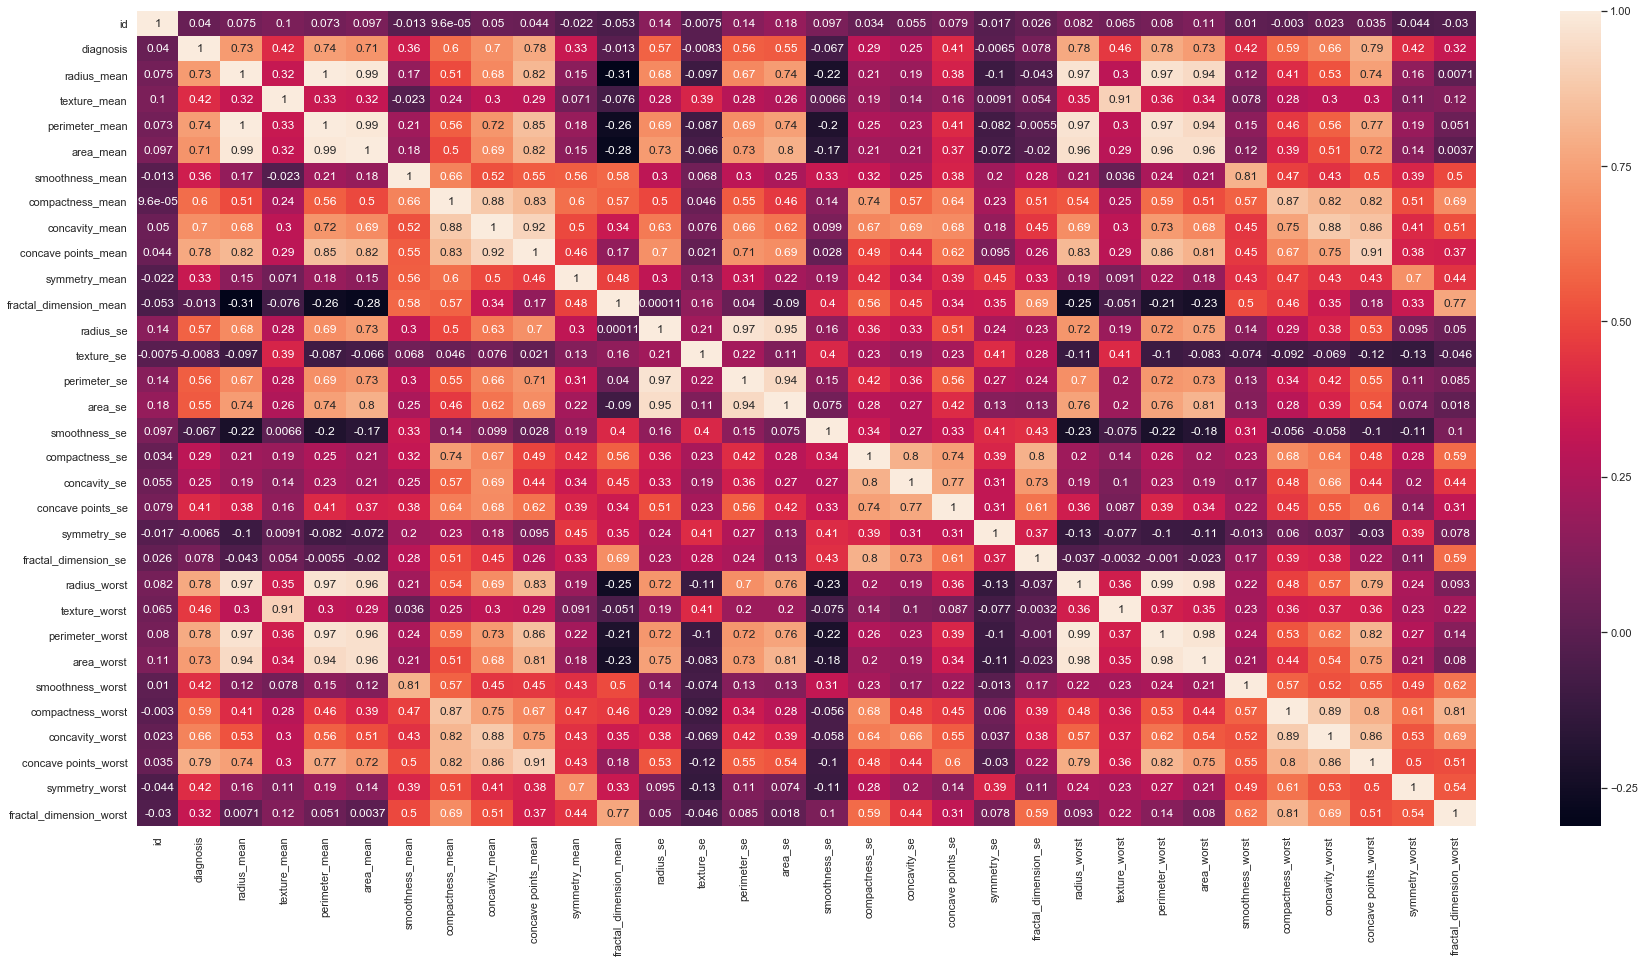

In [179]:
# we can analyze the correlation between features using a heat map.
plt.figure(figsize=(30,15))
corr = df.corr()
sns.heatmap(corr, annot=True)
corr

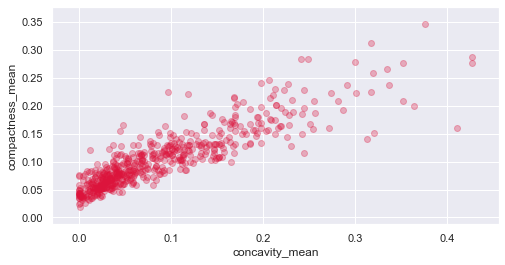

In [180]:
# Using scatterplot, we can draw the correlation between the two variables.
# corr(concavity_mean, compactness_mean) ~ 0.88
# let's draw the plot for these two features.

fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(df['concavity_mean'], df['compactness_mean'], color = 'crimson', alpha = 0.3)
ax.set_xlabel('concavity_mean')
ax.set_ylabel('compactness_mean')
plt.show()

In [201]:
# splitting the dataset
from sklearn import preprocessing

X = df.iloc[:, 2:]
y = df['diagnosis']

mm_scaler = preprocessing.MinMaxScaler().fit(X)
normalized_data = mm_scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

ND_X_train, ND_X_test, y_train, y_test = train_test_split(normalized_data, y, test_size=0.2, random_state=0)

print("Original dataset -> train:", len(X_train), "test:",len(X_test), 
      "\nNormalized dataset -> train:", len(ND_X_train), "test:", len(X_test))

Original dataset -> train: 455 test: 114 
Normalized dataset -> train: 455 test: 114


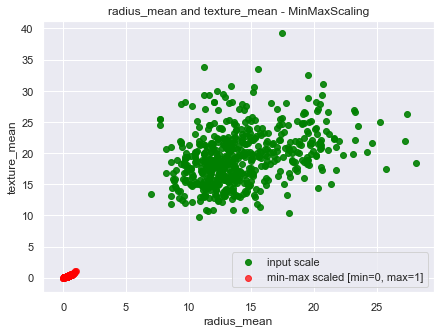

In [202]:
# let's observe the two features comparatively 
# from the data set we scaled with Min-Max scaling.
plt.figure(figsize=(7,5))

plt.scatter(df['radius_mean'], df['texture_mean'],
            color='green', label='input scale', alpha=0.9)
plt.scatter(normalized_df[:,2], normalized_df[:,3],
            color='red', label='min-max scaled [min=0, max=1]', alpha=0.7)

plt.title('radius_mean and texture_mean - MinMaxScaling')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Cluster the OD dataset

In [203]:
# using RandomForestClassifier to select features based on feature importance.
clf = RandomForestClassifier(n_estimators=1000, random_state=0)

RF_selector = SelectFromModel(clf)
RF_selector.fit(X, y)
RF_selector_support = RF_selector.get_support()

# isolate the df with selected features then return them as a list
selected_features = X.loc[:,RF_selector_support].columns.tolist()

print(len(selected_features), "Selected features:", selected_features)

10 Selected features: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst']


In [204]:
# Train the classifier
clf.fit(X_train, y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.9649122807017544

In [186]:
X_selected_train = RF_selector.transform(X_train)
X_selected_test = RF_selector.transform(X_test)

In [187]:
clf_for_selection = RandomForestClassifier(n_estimators=1000, random_state=0)

clf_for_selection.fit(X_selected_train, y_train)

selection_pred = clf_for_selection.predict(X_selected_test)

accuracy_score(y_test, selection_pred)

0.956140350877193